In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

dataset=pd.read_csv('rms data.csv')
X= dataset.iloc[:,[1,2,3,4,5,6]].values
Y=dataset.iloc[:,-1].values
ly = LabelEncoder()
Y = ly.fit_transform(Y)

ly.classes_

array(['A-B', 'A-B-C', 'A-B-C-G', 'A-B-G', 'A-G', 'B-C', 'B-C-G', 'B-G',
       'C-A', 'C-A-G', 'C-G', 'Normal'], dtype=object)

In [2]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.27,random_state=1)

In [3]:
#train_sc here refers to x_train,test_sc -> x_test

scaler = StandardScaler().fit(x_train)
train_sc = scaler.transform(x_train)

test_sc = scaler.transform(x_test)

In [4]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_sc,y_train)

y_pred_test = gnb.predict(test_sc)

acc = accuracy_score(y_test,y_pred_test)
acc

0.8866946432979511

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_sc,y_train)
y_pred2 = dt.predict(test_sc)
acc2 = accuracy_score(y_test,y_pred2)
acc2

0.8288694149592694

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12,algorithm='ball_tree')
knn.fit(train_sc,y_train)
y_pred3 = knn.predict(test_sc)
acc3 =   accuracy_score(y_test,y_pred3)
acc3

0.8666378671932856

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg',multi_class='auto')
logreg.fit(train_sc,y_train)
y_pred = logreg.predict(test_sc)
acc1 = accuracy_score(y_test,y_pred)
acc1

0.8852752406813132

In [8]:
from sklearn.svm import SVC
svc1 = SVC(C=50,kernel='rbf',gamma=1)     
svc1.fit(train_sc,y_train)
y_pred4 = svc1.predict(test_sc)
from sklearn.metrics import accuracy_score
acc4= accuracy_score(y_test,y_pred4)
acc4

0.8857689459392742

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_sc,y_train)
y_pred_rf=rf.predict(test_sc)

acc_rf=accuracy_score(y_test,y_pred_rf)
acc_rf

0.8328807701802025

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier(learning_rate=0.1)
gb.fit(train_sc,y_train)
y_pred_gb=gb.predict(test_sc)

acc_gb=accuracy_score(y_test,y_pred_gb)
acc_gb

0.8705257960997285

In [11]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette


set_palette('paired')

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest,mname):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'A-B', 
                                        1: 'A-B-C', 
                                        2: 'A-B-C-G',
                                        3: 'A-B-G', 4: 'A-G', 5: 'B-C', 6: 'B-C-G',
                                        7: 'B-G', 8: 'C-A', 9: 'C-A-G', 10: 'C-G', 11: 'Normal'},size=(720, 720),
                                        colors=["", "orchid"])
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show(outpath=mname)
    return visualizer


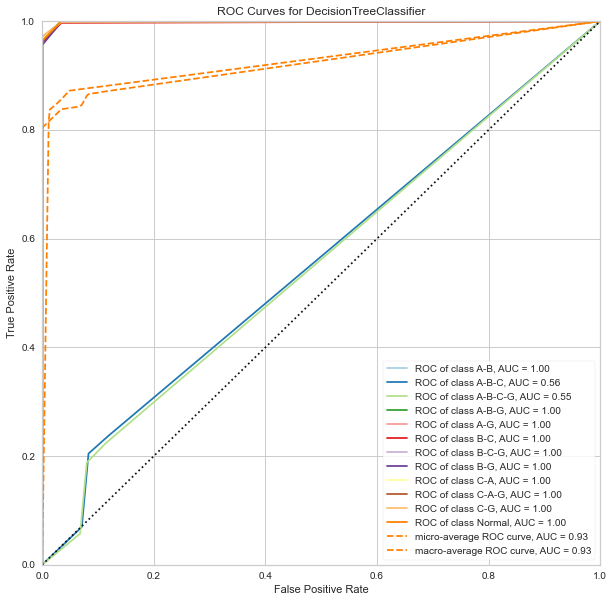

In [12]:
try:
    plot_ROC_curve(dt,train_sc,y_train,test_sc,y_test,mname="Decision Tree")
except AttributeError:
    print(" ")

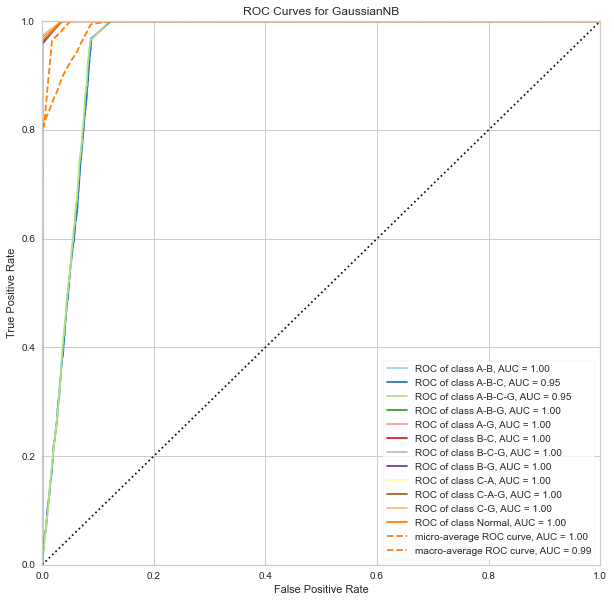

In [13]:
try:
    plot_ROC_curve(gnb,train_sc,y_train,test_sc,y_test,mname="Nayes Bayes")
except AttributeError:
    print(" ")

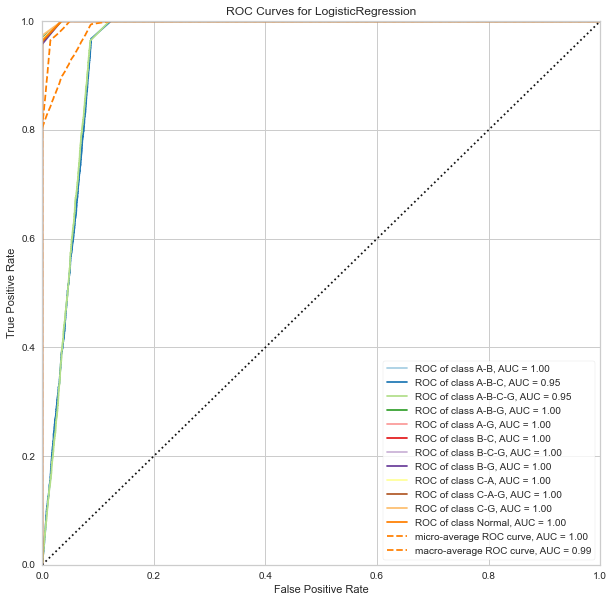

In [14]:
try:
    plot_ROC_curve(logreg,train_sc,y_train,test_sc,y_test,mname="Logistic Regression")
except:
    print(" ")

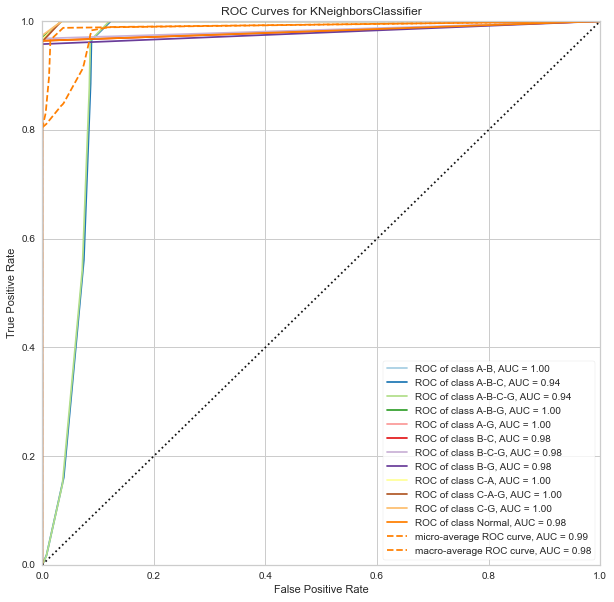

In [15]:
try:
    plot_ROC_curve(knn,train_sc,y_train,test_sc,y_test,mname="K-Neighbours")
except AttributeError:
    print(" ")

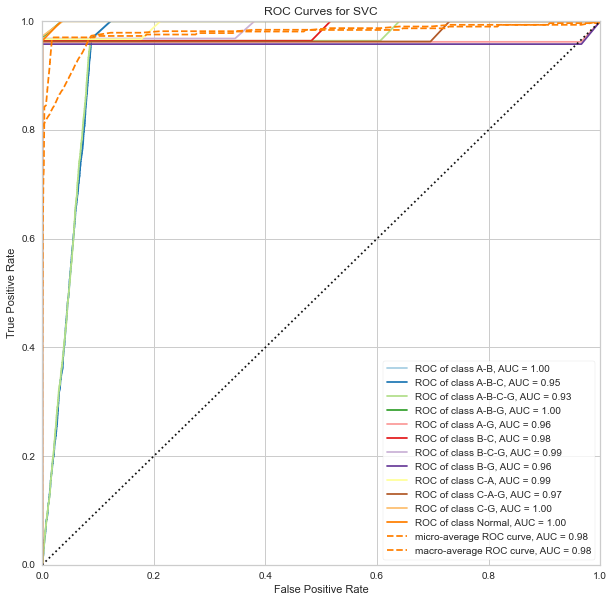

In [16]:
try:
    plot_ROC_curve(svc1,train_sc,y_train,test_sc,y_test,mname="SVM")
except AttributeError:
    print(" ")

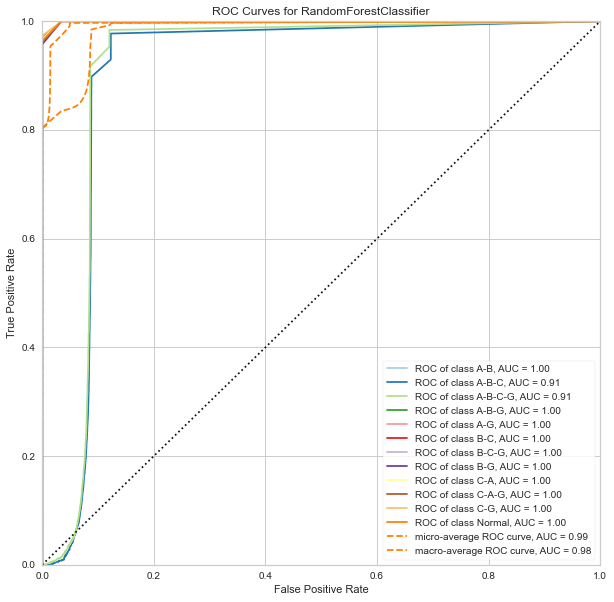

In [17]:
try:
    plot_ROC_curve(rf,train_sc,y_train,test_sc,y_test,mname="Random Forest")
except AttributeError:
    print(" ")

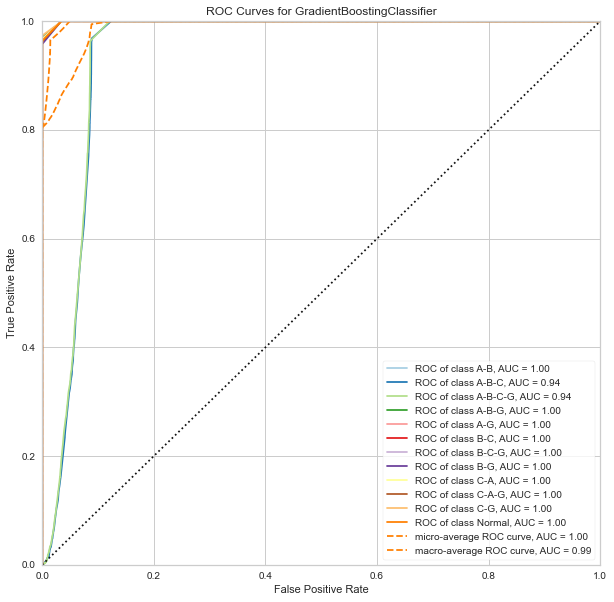

In [18]:
try:
    plot_ROC_curve(gb,train_sc,y_train,test_sc,y_test,mname="Gradient Boosting")
except:
    print(" ")

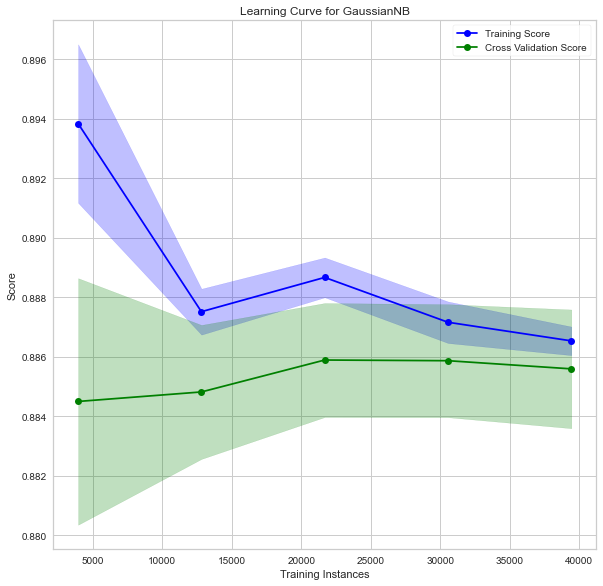

<Figure size 576x396 with 0 Axes>

In [19]:
from yellowbrick.model_selection import learning_curve
set_palette('reset')
try:
    gnbl=learning_curve(gnb,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    gnbl.show(outpath="GNB.png")
except ValueError:
    print(" ")

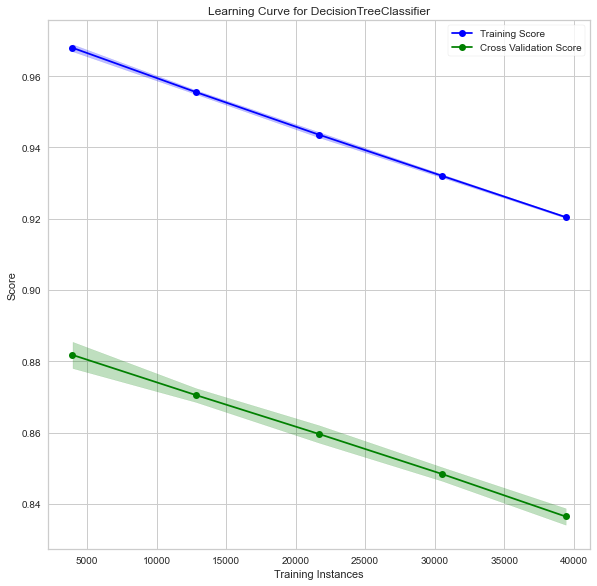

<Figure size 576x396 with 0 Axes>

In [20]:
try:
    dtl=learning_curve(dt,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    dtl.show(outpath="Decision Tree L.png")
except ValueError:
    print(" ")

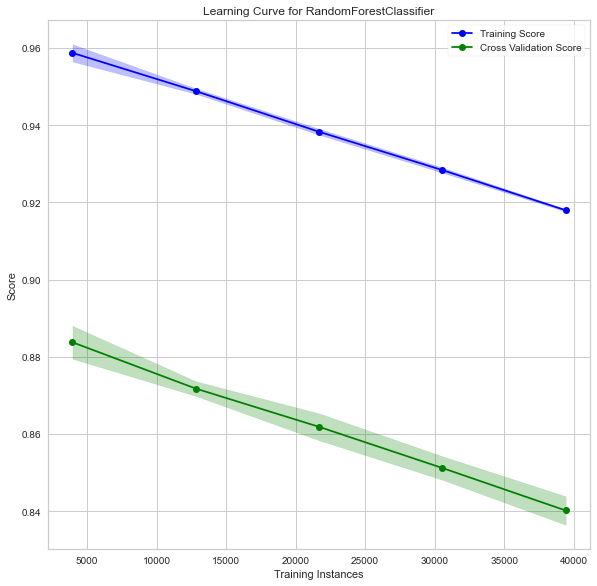

<Figure size 576x396 with 0 Axes>

In [21]:
try:
    rfl=learning_curve(rf,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    rfl.show(outpath="Random Forest L.png")
except ValueError:
    print(" ")

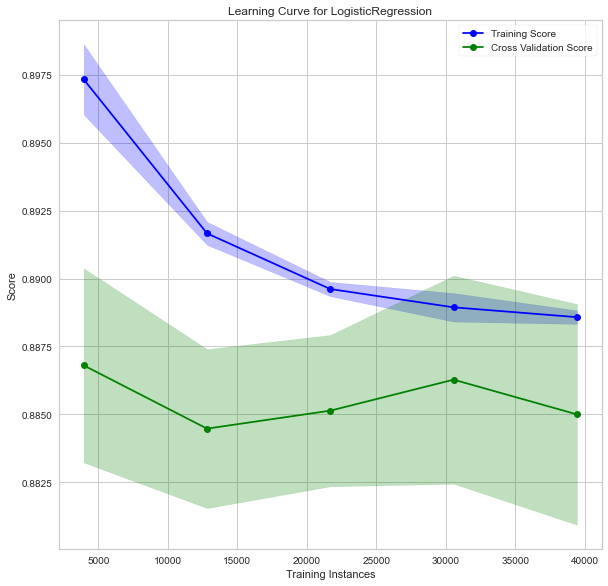

<Figure size 576x396 with 0 Axes>

In [22]:
try:    
    logregl=learning_curve(logreg,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    logregl.show(outpath="Logistic Regression L.png")
except ValueError:
    print(" ")

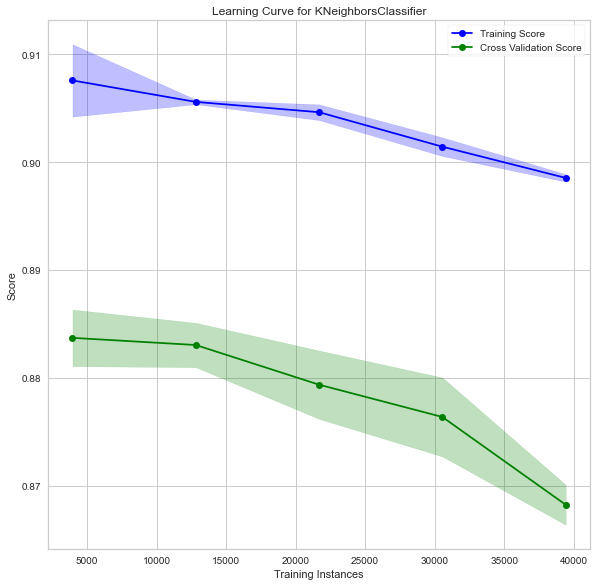

<Figure size 576x396 with 0 Axes>

In [23]:
try:
    knnl=learning_curve(knn,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    knnl.show(outpath="KNN L.png")
except ValueError:
    print(" ")

In [ ]:
try:
    svcl=learning_curve(svc1,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    svcl.show(outpath="SVM L.png")
except ValueError:
    print(" ")

In [ ]:
try:
    gbl=learning_curve(gb,train_sc, y_train, cv=10, scoring='accuracy',size=(700, 700))
    gbl.show(outpath="Gradient Boosting L.png")
except ValueError:
    print(" ")